### Linear regression

Imports

In [1]:
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import tree as sktree
from sklearn import linear_model

In [2]:
X_train = pd.read_csv("sets/X_train.csv")
X_test = pd.read_csv("sets/X_test.csv")
y_train = pd.read_csv("sets/y_train.csv")
y_test = pd.read_csv("sets/y_test.csv")

Linear regression is a simple ML model. We want to try to find the best hyperplane to fit the features in our data

In [3]:
linearReg = linear_model.LinearRegression()
linearReg.fit(X_train, y_train)
y_pred = linearReg.predict(X_test)
y_pred_train = linearReg.predict(X_train)

In [4]:
print(f"RMSE: {metrics.mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {metrics.r2_score(y_test, y_pred)}")

print(f"RMSE for training: {metrics.mean_squared_error(y_train, y_pred_train, squared=False)}")
print(f"R2 for training: {metrics.r2_score(y_train, y_pred_train)}")

RMSE: 17.548428615085562
R2: 0.11954050553075657
RMSE for training: 17.615191107941403
R2 for training: 0.12080589650333784


We can see that the model perform similar in both train and test set, because linear regression can't overfit data.

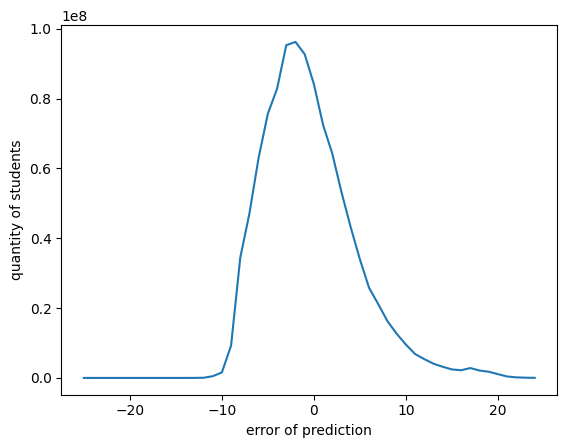

In [5]:

intervals=50
sliceInterval= 200/intervals
quantities=np.zeros(intervals)
y_diff=y_pred-y_test.values.flatten()

for j in range(intervals):
    quantities[j]= np.logical_and(y_diff >(sliceInterval*j)-100,y_diff < (sliceInterval*(j+1))-100).sum()

plt.plot(range(-intervals//2,intervals//2),quantities)
plt.xlabel("error of prediction")
plt.ylabel("quantity of students")
plt.show()